In [93]:
import json
with open('D:/Data/JsonData/TainanFood/FinishTainanBigTable.json') as f:
    bigtable=json.load(f)

In [94]:
dienVec={dien['name']:dien['featurescores'] for dien in bigtable}

In [95]:
dienVec

{'同記安平豆花(安平總店)': {'份量大': 0.13,
  '偏甜': 0.24,
  '偏酸': 0.2,
  '其他正面情緒': 0.19,
  '划算': 0.19,
  '口味清淡': 0.07,
  '服務好': -0.15,
  '環境好': 0.14,
  '食物很香': 0.22,
  '食物精緻漂亮': 0.19,
  '食物美味': 0.37},
 '深藍咖啡館': {'份量大': 0.04,
  '偏甜': 0.33,
  '其他正面情緒': 0.21,
  '划算': -0.8,
  '小份量': 0.05,
  '服務好': 0.13,
  '環境好': 0.25,
  '重口味': 0.06,
  '食物很香': 0.29,
  '食物精緻漂亮': 0.3,
  '食物美味': 0.61},
 '阿堂鹹粥': {'份量大': 0.48,
  '偏甜': 0.12,
  '偏辣': 0.02,
  '其他正面情緒': 0.24,
  '划算': -0.23,
  '口味清淡': 0.02,
  '服務好': 0.09,
  '環境好': 0.04,
  '重口味': 0.08,
  '食物很香': 0.1,
  '食物精緻漂亮': 0.23,
  '食物美味': 0.61},
 '富盛號碗粿': {'份量大': 0.4,
  '偏甜': 0.41,
  '偏辣': 0.09,
  '其他正面情緒': 0.24,
  '划算': 0.18,
  '口味清淡': 0.04,
  '小份量': 0.03,
  '服務好': 0.11,
  '環境好': 0.29,
  '重口味': 0.14,
  '食物很香': 0.12,
  '食物精緻漂亮': 0.24,
  '食物美味': 0.58},
 '依蕾特布丁奶酪(安平門市)': {'份量大': 0.08,
  '偏甜': 0.29,
  '偏酸': 0.2,
  '其他正面情緒': 0.15,
  '划算': 0.06,
  '口味清淡': 0.07,
  '小份量': 0.05,
  '環境好': 0.08,
  '食物很香': 0.29,
  '食物精緻漂亮': 0.1,
  '食物美味': 0.55},
 '食下有約 想法廚房': {'份量大': 0.54,
  '偏甜': 0.28

In [96]:
def like(wordict,word1,word2):
    publicwords=set(wordict[word1])&set(wordict[word2])
    if publicwords==set():
        return {word2:0}
    n=0
    for word in wordict[word1]:
        n+=wordict[word1][word]**2
    m=0
    for word in wordict[word2]:
        m+=wordict[word2][word]**2
    l=0
    for word in publicwords:
        l+=wordict[word1][word]*wordict[word2][word]

    if ((n**(1/2))*(m**(1/2)))==0:
        return {word2:0}
    sim=l/((n**(1/2))*(m**(1/2)))
    
    return {word2:sim}

In [97]:
like(dienVec,'同記安平豆花(安平總店)','阿堂鹹粥')

{'阿堂鹹粥': 0.623659878069961}

In [98]:
def checksim(word1,wordict,N=10):
    simi={}
    from collections import Counter
    for word2 in wordict:
        simi.update(like(wordict,word1,word2))
    del simi[word1]
    simi=Counter(simi).most_common(N)
#     print(word1+' 相近詞')
    return dict(simi)

In [232]:
checksim('同記安平豆花(安平總店)',dienVec,N=10)

{'依蕾特布丁奶酪(安平門市)': 0.910078692094371,
 '喀串串場': 0.8958803295697167,
 '有間冰舖': 0.8984583257270112,
 '牛墟溫體牛肉/豬肉火鍋': 0.8895558495103716,
 '石二鍋': 0.8876451297751662,
 '芙聿閣菓子屋': 0.8979732206865776,
 '茂記安平黑豆花': 0.9236483563633604,
 '蜜露爾': 0.8992760670972441,
 '貝絲貝絲bacibaci手工甜點': 0.8867915543629975,
 '進福炒鱔魚專家': 0.8894575962490057}

In [61]:
dienCossim=[{'name':dien,'similar':checksim(dien,dienVec,N=500)} for dien in dienVec]

# dienCossim={dien:checksim(dien,dienVec,N=500) for dien in dienVec}

In [62]:
dienCossim[0]

{'name': '同記安平豆花(安平總店)',
 'similar': {'0628全日早午餐店': 0.8458744788208983,
  '1934街役場古蹟餐坊': 0.7889114557841682,
  '235巷': 0.7834310863395811,
  '94i手感烘焙': 0.8249529727843858,
  '9分10刻 西式新料理(中正店)': 0.8393022626169229,
  'A WEEK PANCAKE&COFFEE': 0.7772229817709725,
  "Alleycat's 手工窯烤披薩(南紡夢時代)": 0.7948013265088042,
  'AngryBurger': 0.7877973930923576,
  'Autumn舒芙蕾熱鬆餅': 0.8138422292885951,
  'BOP Lazy club': 0.780367245166027,
  'Brick磚塊': 0.8228104757466952,
  'Bungy Jump Korean BBQ 笨豬跳 - 台南店': 0.7941032562422751,
  'CHEERYWOOD 櫻桃木': 0.7863537219436513,
  'Cape cafe開普咖啡': 0.7861611289078101,
  'Capricciosa 卡布里喬莎(台南西門三越店)': 0.8253004859583171,
  'Churro & Sweet': 0.7858609888494091,
  'Cocina Quesadilla': 0.7832668491009852,
  "Coffee Cafe' 咖啡珈琲": 0.8276220505366542,
  'Curry+ Kitchen 誠欣廚房': 0.8260819187716817,
  'Dazzling Cafe(台南新光三越中山店)': 0.8487021041298884,
  'Dining & BAR 和-NAGOMI': 0.8084109378192752,
  'Do - Li  BAKERY CAFE 多麗咖啡烘焙美食': 0.8841762655709257,
  'Double Cheese 手工窯烤披薩': 0.8391

# Kmeans

In [331]:
from sklearn.cluster import KMeans
from sklearn import datasets, metrics
import numpy as np

In [332]:
motions=set()
for dien in dienVec:
    motions.update(set(dienVec[dien].keys()))
motions

{'份量大',
 '偏甜',
 '偏辣',
 '偏酸',
 '其他正面情緒',
 '划算',
 '口味清淡',
 '小份量',
 '服務好',
 '無評',
 '環境好',
 '重口味',
 '食物很香',
 '食物精緻漂亮',
 '食物美味'}

In [333]:
for dien in dienVec:
    for motion in motions:
        if motion not in dienVec[dien]:
            dienVec[dien][motion]=0

In [334]:
Vecs=[list(dienVec[dien].values()) for dien in dienVec]

In [335]:
dienVec['同記安平豆花(安平總店)']

{'份量大': 0.13,
 '偏甜': 0.24,
 '偏辣': 0,
 '偏酸': 0.2,
 '其他正面情緒': 0.19,
 '划算': 0.19,
 '口味清淡': 0.07,
 '小份量': 0,
 '服務好': -0.15,
 '無評': 0,
 '環境好': 0.14,
 '重口味': 0,
 '食物很香': 0.22,
 '食物精緻漂亮': 0.19,
 '食物美味': 0.37}

In [336]:
X = np.array(Vecs)
X[0]

array([ 0.37,  0.22,  0.19,  0.19,  0.14,  0.13,  0.24,  0.19,  0.07,
        0.2 , -0.15,  0.  ,  0.  ,  0.  ,  0.  ])

In [496]:
kmeans = KMeans(n_clusters=5, 
            init='random', 
            n_init=20, 
            max_iter=50,
            tol=1e-04,
            random_state=0).fit(X)

# n_init=10, 隨機做十次  自動找出SSE最小的那一次
# max_iter=300, 或是 tol=1e-04, 為中止條件

In [497]:
kmeans.labels_

array([1, 1, 1, ..., 0, 3, 4])

In [498]:
#印出績效
silhouette_avg = metrics.silhouette_score(Vecs, kmeans.labels_)
print(silhouette_avg)

0.385585491385


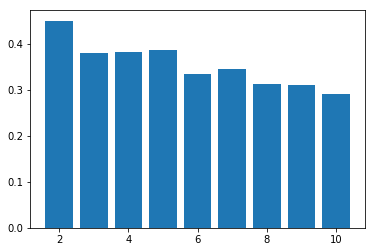

[0.45031190271172145, 0.38096822877558018, 0.38141909367127191, 0.38573173350201978, 0.33346781356501626, 0.3459679654780648, 0.31287981667813075, 0.31057102316659152, 0.2914703408288884]


In [499]:
#silhouette_score分數愈高，代表分群分得愈好
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [575]:
kmeanstable=[{'name':dien,'cluster':cluster,'vec':{tag:dienVec[dien][tag] for tag in dienVec[dien] if dienVec[dien][tag]>0} } for dien,cluster,vec in zip(dienVec,kmeans.labels_,Vecs)]

In [576]:
import pandas as pd
Y = pd.DataFrame(kmeanstable)

In [598]:
Y

,cluster,name,vec
0,1,同記安平豆花(安平總店),"{'食物美味': 0.37, '食物很香': 0.22, '食物精緻漂亮': 0.19, '..."
1,1,深藍咖啡館,"{'食物美味': 0.61, '環境好': 0.25, '食物很香': 0.29, '其他正..."
2,1,阿堂鹹粥,"{'食物美味': 0.61, '食物很香': 0.1, '環境好': 0.04, '份量大'..."
3,1,富盛號碗粿,"{'食物美味': 0.58, '食物精緻漂亮': 0.24, '食物很香': 0.12, '..."
4,1,依蕾特布丁奶酪(安平門市),"{'食物美味': 0.55, '食物很香': 0.29, '食物精緻漂亮': 0.1, '其..."
5,2,食下有約 想法廚房,"{'食物美味': 1.36, '食物很香': 0.82, '環境好': 0.97, '食物精..."
6,2,飛饗創意西式料理,"{'食物美味': 1.33, '食物很香': 0.69, '划算': 0.31, '環境好'..."
7,1,莉莉水果店,"{'食物美味': 0.53, '環境好': 0.19, '食物精緻漂亮': 0.34, '其..."
8,0,連得堂餅舖,"{'食物美味': 0.3, '其他正面情緒': 0.08, '食物精緻漂亮': 0.28, ..."
9,1,矮仔成蝦仁飯,"{'食物美味': 0.55, '環境好': 0.25, '食物精緻漂亮': 0.2, '其他..."


In [578]:
Y['cluster'].value_counts()

0    2807
1    1138
3     943
4     456
2     424
Name: cluster, dtype: int64

In [579]:
grouped = Y["vec"].groupby(Y['cluster'])

In [580]:
grouped.all()

cluster        
1        份量大       0.46
         偏甜        0.35
         偏酸        0.30
         其他正面情緒    0.35
         划算        0.32
         服務好       0.33
         環境好       0.38
         重口味       0.92
         食物很香      0.17
         食物精緻漂亮    0.36
         食物美味      0.63
2        份量大       0.44
         偏辣        0.40
         其他正面情緒    0.90
         服務好       0.33
         環境好       0.28
         食物很香      0.50
         食物精緻漂亮    0.80
         食物美味      0.93
3        無評        1.00
4        份量大       0.22
         其他正面情緒    0.20
         環境好       0.28
         食物很香      0.50
         食物精緻漂亮    0.13
         食物美味      0.54
Name: vec, dtype: float64

In [503]:
from sklearn import decomposition
from sklearn import manifold

In [504]:
#降維
pca = decomposition.PCA(n_components=2)
X1= pca.fit_transform(Vecs)


In [505]:
import matplotlib.pyplot as plt
def plot_clustering(X, labels, title=None):
    plt.figure(figsize=(6, 4))
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=plt.cm.spectral(labels[i] / 10.))
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


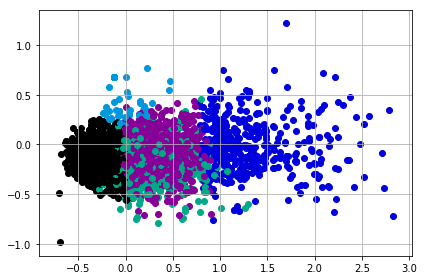

In [506]:
plot_clustering(X1, kmeans.labels_)

In [507]:
#第二種降維
X2 = manifold.SpectralEmbedding(n_components=2).fit_transform(Vecs)

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


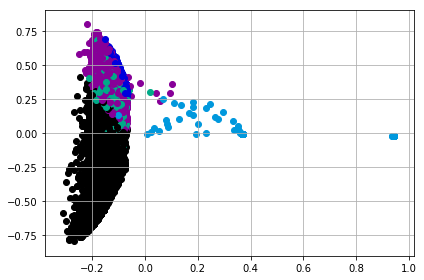

In [508]:
plot_clustering(X2, kmeans.labels_)